# Imports and Settings

In [1]:
import numpy as np
import torch
import torch.nn as nn
from Code.Models.SchNet.schnet import SchNet
from Code.Train.trainer import Trainer
from Code.Tools.Network.lr_scheduler import AbcExponentialLR
import matplotlib
%matplotlib inline

In [2]:
debug = False
use_cuda = True

In [3]:
data_path_train = './Dataset/SchNet/iso17_train_X.npy'
label_path_train = './Dataset/SchNet/iso17_train_Y.npy'
data_path_within = './Dataset/SchNet/iso17_within_X.npy'
label_path_within = './Dataset/SchNet/iso17_within_Y.npy'
comment = 'normalized'
eval_path = './evaluation/SchNet'

# Load Data

In [4]:
X_train = np.load(data_path_train)
Y_train = np.load(label_path_train) * -1
X_within = np.load(data_path_within)
Y_within = np.load(label_path_within) * -1

In [5]:
X_train.shape

(404000, 19, 19)

In [6]:
if debug:
    n_data = 4000
    X_train = X_train[:n_data]
    Y_train = Y_train[:n_data]
    X_within = X_within[:n_data]
    Y_within = Y_within[:n_data]

# Initialize Network

In [7]:
optimizer = torch.optim.Adam
loss_fn = torch.nn.MSELoss
lr_scheduler = AbcExponentialLR
lr_schedule = (0.001, 0.96, 1)
schnet = SchNet()
trainer = Trainer(model=schnet, optimizer=optimizer, loss_fn=loss_fn, eval_path=eval_path,
                  comment=comment, lr_scheduler=lr_scheduler, abc_schedule=lr_schedule,
                  use_cuda=use_cuda, lr_step='s100000', single_test_batch=True)

In [8]:
trainer.create_dataloaders(X_train, Y_train, X_within, Y_within, 32, standardize_X=True, num_workers=2)

# Train

In [9]:
trainer.fit(160)

epoch: 1	progress: 0.01	time estimate: 1302.33	train loss: 0.006135	test loss: 0.004904
epoch: 2	progress: 0.01	time estimate: 1294.2	train loss: 0.002341	test loss: 0.001544
epoch: 3	progress: 0.02	time estimate: 1284.91	train loss: 0.001934	test loss: 0.001329
epoch: 4	progress: 0.03	time estimate: 1276.76	train loss: 0.001766	test loss: 0.001151
epoch: 5	progress: 0.03	time estimate: 1268.7	train loss: 0.001677	test loss: 0.00098
epoch: 6	progress: 0.04	time estimate: 1260.45	train loss: 0.001597	test loss: 0.001189
epoch: 7	progress: 0.04	time estimate: 1252.28	train loss: 0.001544	test loss: 0.0012
epoch: 8	progress: 0.05	time estimate: 1244.08	train loss: 0.001496	test loss: 0.001022
epoch: 9	progress: 0.06	time estimate: 1236.01	train loss: 0.001456	test loss: 0.000884
epoch: 10	progress: 0.06	time estimate: 1227.81	train loss: 0.001415	test loss: 0.001445
epoch: 11	progress: 0.07	time estimate: 1219.63	train loss: 0.001385	test loss: 0.001059
epoch: 12	progress: 0.07	time estim

epoch: 95	progress: 0.59	time estimate: 532.35	train loss: 0.000695	test loss: 0.001031
epoch: 96	progress: 0.6	time estimate: 524.16	train loss: 0.000694	test loss: 0.000959
epoch: 97	progress: 0.61	time estimate: 515.97	train loss: 0.000693	test loss: 0.000957
epoch: 98	progress: 0.61	time estimate: 507.78	train loss: 0.000692	test loss: 0.000978
epoch: 99	progress: 0.62	time estimate: 499.59	train loss: 0.000691	test loss: 0.000978
epoch: 100	progress: 0.62	time estimate: 491.4	train loss: 0.00069	test loss: 0.001059
epoch: 101	progress: 0.63	time estimate: 483.21	train loss: 0.000689	test loss: 0.001013
epoch: 102	progress: 0.64	time estimate: 475.02	train loss: 0.000688	test loss: 0.000997
epoch: 103	progress: 0.64	time estimate: 466.83	train loss: 0.000687	test loss: 0.001048
epoch: 104	progress: 0.65	time estimate: 458.65	train loss: 0.000686	test loss: 0.000974
epoch: 105	progress: 0.66	time estimate: 450.46	train loss: 0.000686	test loss: 0.001014
epoch: 106	progress: 0.66	tim

Process Process-613:
KeyboardInterrupt
Process Process-614:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/stfn/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/stfn/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/stfn/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/stfn/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/stfn/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/home/stfn/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/home/stfn/anaco

KeyboardInterrupt: 

# Evaluate

In [10]:
trainer.calculate_mae()

0.15499325096607208

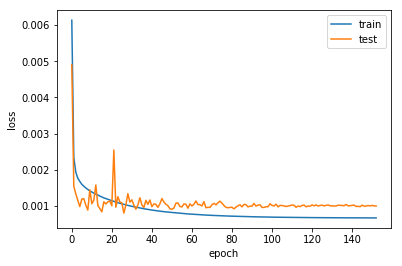

In [11]:
trainer.create_loss_plot()

In [12]:
trainer.show_loss_plot()

/home/stfn/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


In [13]:
trainer.save_loss_plot()